In [2]:
import numpy as np
import matplotlib.pyplot as plt

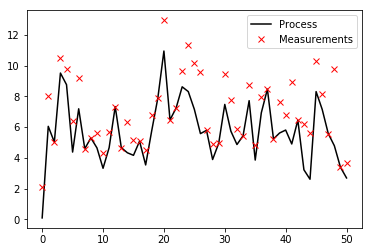

In [3]:
np.random.seed(0)
# initial conditions
mu0 = 0
P0 = 2

T = 50 # number of steps
Q = 10 # process noise
R = 1 # measurement noise

# ground truth and measurements
x = np.zeros(T+1)
y = np.zeros(T+1)
x[0] = 0.1
y[0] = x[0] + np.random.poisson(np.sqrt(R))
for k in range(0,T):
    x[k + 1] = 0.5*x[k] + np.random.poisson(np.sqrt(Q))
    y[k + 1] = x[k+1] + np.random.poisson(np.sqrt(R))

plt.figure(1)
plt.plot(range(T+1), x, 'k-', label='Process')
plt.plot(range(T+1), y, 'rx', label='Measurements')
plt.legend(loc='best')
#plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
plt.show()

In [4]:
# load estimates 
pf_x = np.load('estimates/pf_x_g.npy')
enkf_x = np.load('estimates/enkf_x_g.npy')
ukf_x = np.load('estimates/ukf_x_g.npy')
ekf_x = np.load('estimates/exf_x_g.npy')
kf_x = np.load('estimates/kf_x_g.npy')

In [5]:
# calculate MSE 
pf_mse = np.sum(np.subtract(x, pf_x)**2) / len(pf_x)
print('PF MSE: %s' % (pf_mse))
enkf_mse = np.sum(np.subtract(x, enkf_x)**2) / len(enkf_x)
print('ENKF MSE: %s' % (enkf_mse))
ukf_mse = np.sum(np.subtract(x, ukf_x)**2) / len(ukf_x)
print('UKF MSE: %s' % (ukf_mse))
ekf_mse = np.sum(np.subtract(x, ekf_x)**2) / len(ekf_x)
print('EKF MSE: %s' % (ekf_mse))
kf_mse = np.sum(np.subtract(x, kf_x)**2) / len(kf_x)
print('KF MSE: %s' % (kf_mse))

PF MSE: 1.8633447002064325
ENKF MSE: 3.9092846908853724
UKF MSE: 3.5531940569185396
EKF MSE: 10.224193092638401
KF MSE: 32.979516100318016


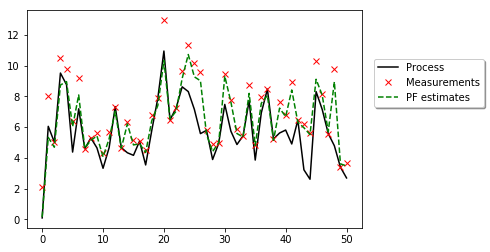

In [11]:
plt.figure(1)
plt.plot(range(T+1), x, 'k-', label='Process')
plt.plot(range(T+1), y, 'rx', label='Measurements')
plt.plot(range(T+1), pf_x, 'g--', label='PF estimates')
#plt.plot(range(T+1), enkf_x, 'b--', label='ENKF estimates')
#plt.plot(range(T+1), ukf_x, 'c--', label='UKF estimates')
#plt.plot(range(T+1), ekf_x, 'm--', label='EKF estimates')
#plt.plot(range(T+1), kf_x, 'y--', label='KF estimates')
#plt.legend(loc='lower left')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
plt.show()